# 泰坦尼克号数据集的端到端探索性数据分析 (EDA)

**项目目标:** T对泰坦尼克号数据集进行全面、循序渐进的探索性数据分析，以了解影响泰坦尼克号幸存者生存的关键因素。本笔记本将作为完整的指南，涵盖数据加载、清洗、分析、特征工程和可视化，并在每个阶段提供理论解释。

---

### **理论概念：什么是探索性数据分析 (EDA)？**

探索性数据分析是至关重要的过程，它通过对数据进行初步调查，利用汇总统计和图形表示来发现模式、识别异常、检验假设并检查前提假设。它并非正式建模或假设检验，而是在构建模型之前了解数据。

**为什么它很重要？**

1. **理解数据：** 它帮助您理解变量及其关系。

2. **数据清洗：** 它揭示缺失值、异常值和其他需要处理的不一致之处。

3. **特征选择：** 它帮助您确定哪些变量对您的问题最为重要（特征工程和特征选择）。

4. **假设检验：** 它允许您检验某些机器学习模型所需的假设（例如，正态性、线性性）。

### 使用的库：Pandas 和 Seaborn

1. **Pandas**：这是一个功能强大的 Python 数据操作和分析库。它提供了诸如 DataFrame 之类的数据结构，这些结构对于处理表格数据至关重要。我们使用 Pandas 加载数据集、处理缺失值并执行各种数据转换。

2. **Seaborn**：Seaborn 构建于 Matplotlib 之上，是一个统计数据可视化库。它提供了一个高级接口，用于绘制美观且信息丰富的统计图形。我们使用 Seaborn 创建了各种图表，例如计数图、直方图、箱线图和条形图，以可视化数据中的分布和关系。

### 第一步：设置 - 导入库

我们将首先导入用于数据处理（`pandas`、`numpy`）和可视化（`matplotlib`、`seaborn`）的基本 Python 库。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
import os 

sys.path.append(os.path.abspath(os.path.join('../..')))

# Set plot style for better aesthetics
sns.set(style='whitegrid')

### 第二步：数据加载和初步检查

我们将加载数据集，并初步查看其结构、内容和整体状况。

In [2]:
# !git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

In [3]:
# Load the dataset from a URL
titanic_df = pd.read_csv(r'../Datasets/Titanic_Dataset/Titanic-Dataset.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
titanic_df.head()

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.shape

(891, 12)

In [6]:
# Get a concise summary of the dataframe
print("\nDataset Information:")
titanic_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**`.info()` 的解读：**

- 数据集包含 891 条记录（乘客）和 12 列。

- **已识别的缺失值：** `Age`、`Cabin` 和 `Embarked` 列存在缺失值。`Cabin` 列缺失的数据量较大（约 77%），需要特别关注。

In [7]:
# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
titanic_df.describe()


Descriptive Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**`.describe()` 函数结果解读：**

- **幸存者：** 此数据集中约有 38.4% 的乘客幸存。

- **年龄：** 年龄范围从约 5 个月到 80 岁，平均年龄约为 30 岁。

- **票价：** 票价分布严重偏斜，平均票价为 32 美元，但中位数仅为 14.45 美元。最高票价超过 512 美元，表明存在极端异常值。

In [8]:
titanic_df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

### 第三步：数据清洗

在进行分析之前，我们必须处理已识别出的缺失值。

#### **理论概念：缺失值插补**

插补是指用替代值替换缺失数据的过程。插补策略取决于数据类型及其分布：

- **数值型数据：** 对于偏态分布（例如“年龄”和“票价”），使用**中位数**比均值更稳健，因为它不受异常值的影响。

- **分类数据：** 常用的策略是用**众数**（出现频率最高的值）填充缺失值。

- **高基数/缺失值过多：** 对于像“舱位”这样大部分数据都缺失的列，插补可能无效。我们可以删除该列，或者从中创建一个新特征（例如，“有舱位”）。

In [9]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print("Missing values before cleaning:")
titanic_df.isna().sum()

Missing values before cleaning:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
median = titanic_df['Age'].median()
print(median)

28.0


In [12]:
# 1. Handle missing 'Age' values
# We use the median to fill missing ages because the age distribution can be skewed.
median_age = titanic_df['Age'].median()
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)

# Verify that there are no more missing values in the columns we handled so far
print("Missing values after Age cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Age cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [13]:
mode = titanic_df['Embarked'].mode()[0]
print(mode)

S


In [14]:
# 2. Handle missing 'Embarked' values
# Since there are only two missing values, we'll fill them with the most common port of embarkation (the mode).
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

# Verify that there are no more missing values in the columns we handled so far
print("Missing values after Embarked cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


In [15]:
# 3. Handle the 'Cabin' column
# With over 77% missing data, imputing is not a good idea. Instead, we'll create a new feature 'Has_Cabin'.
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int) # 1 if has cabin, 0 if not
titanic_df.drop('Cabin', axis=1, inplace=True) # Drop the original column

titanic_df['Cabin'].notna(): This checks each value in the 'Cabin' column to see if it is not a missing value (NaN). It returns a boolean Series (True for non-missing, False for missing).

In [16]:
titanic_df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [17]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [18]:
# Verify that there are no more missing values in the columns we handled
print("Missing values after cleaning:")
titanic_df.isna().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

### 第四步：单变量分析

我们分别分析每个变量，以了解其分布情况。

#### **理论概念：单变量分析**

这是最简单的数据分析形式，分析的数据仅包含一个变量。其主要目的是描述数据并发现其中的模式。

- **对于分类变量：** 我们使用频数表、条形图（`countplot`）或饼图来查看每个类别的计数或比例。

- **对于数值变量：** 我们使用直方图（`histplot`）或核密度图（`kdeplot`）来了解分布情况，并使用箱线图（`boxplot`）来识别集中趋势、离散程度和异常值。

Analyzing categorical features:


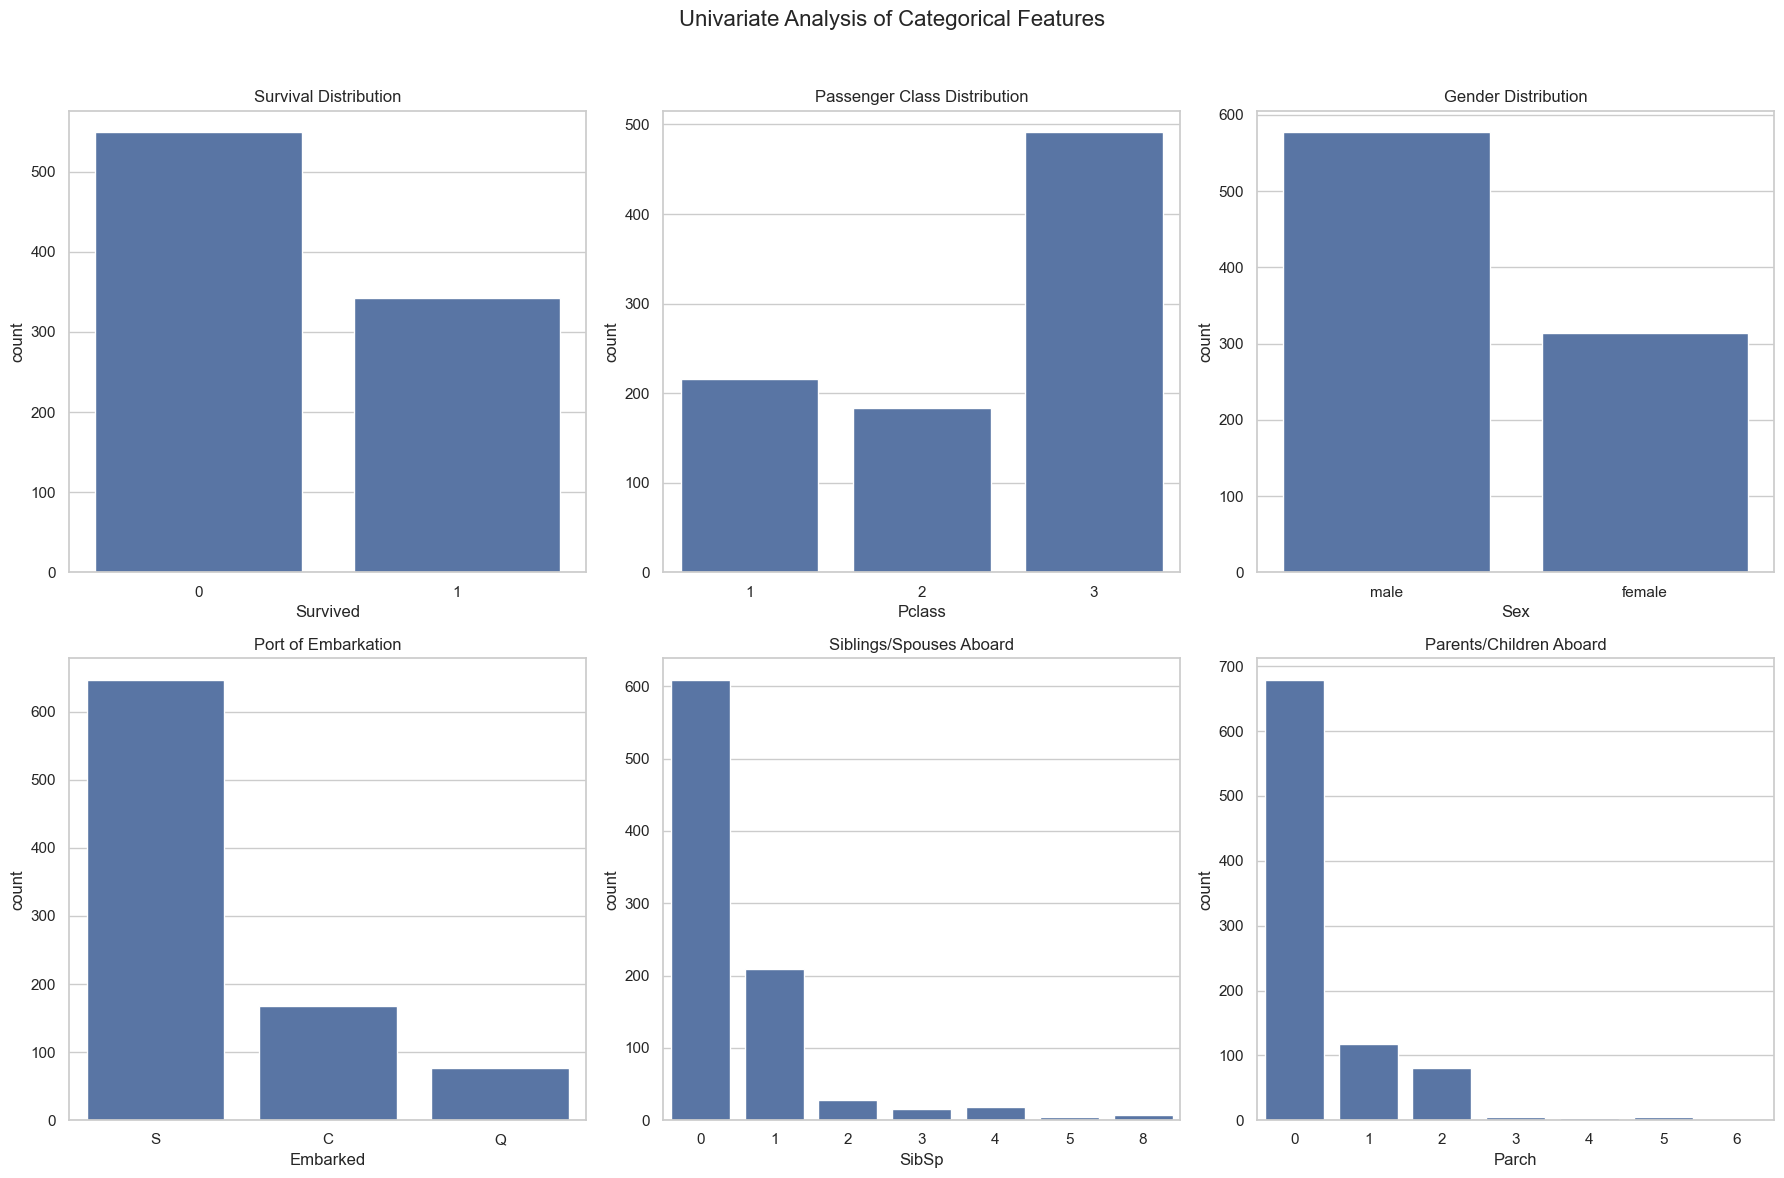

In [19]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**关键信息（分类）：**

- **生存情况**：大多数乘客（超过500人）未能幸存。

- **舱位等级**：三等舱乘客最多，其次是一等舱，然后是二等舱。

- **性别**：男性乘客明显多于女性乘客。

- **登船地点**：绝大多数乘客从南安普顿（“S”）登船。

- **同行情况**：大多数乘客独自旅行。


Analyzing numerical features:


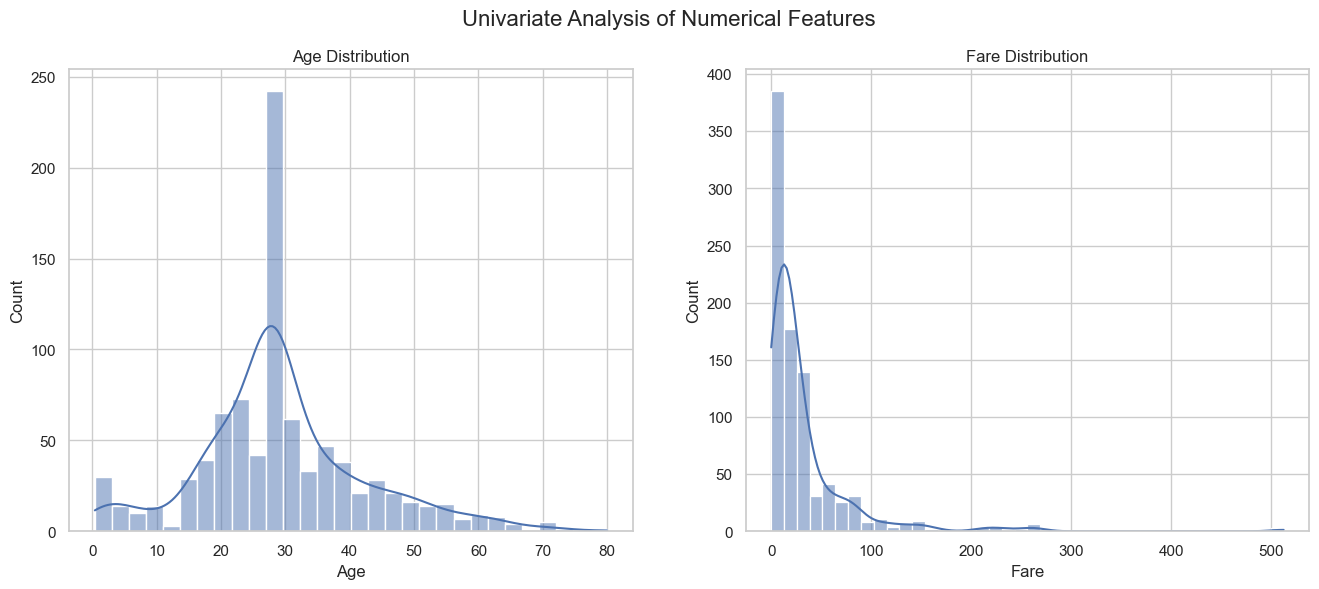

In [20]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=titanic_df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=titanic_df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**关键信息（数值）：**

- **年龄：** 分布峰值出现在 20-30 岁年龄段。请注意，我们用中位数 (28) 填充了缺失值，这导致了中间柱状图的高度。

- **票价：** 分布呈明显的右偏态，证实了大多数机票价格低廉，只有少数例外情况价格非常昂贵。

### 第五步：双变量分析

在此，我们将探索两个变量之间的关系。我们的主要关注点是每个特征如何与我们的目标变量“存活”相关联。

#### **理论概念：双变量分析**

这类分析涉及两个不同的变量，其主要目的是找出它们之间的关系。

- **分类变量与数值变量：** 为了比较不同类别中的数值变量，我们通常使用条形图（barplot），它显示了每个类别中数值变量的均值（或其他估计值）。我们也可以使用箱线图或小提琴图。

- **分类变量与分类变量：** 我们可以使用堆叠条形图或列联表（交叉表）。

- **数值变量与数值变量：** 散点图是标准选择，通常使用相关矩阵来量化变量之间的关系。

Bivariate Analysis: Feature vs. Survival


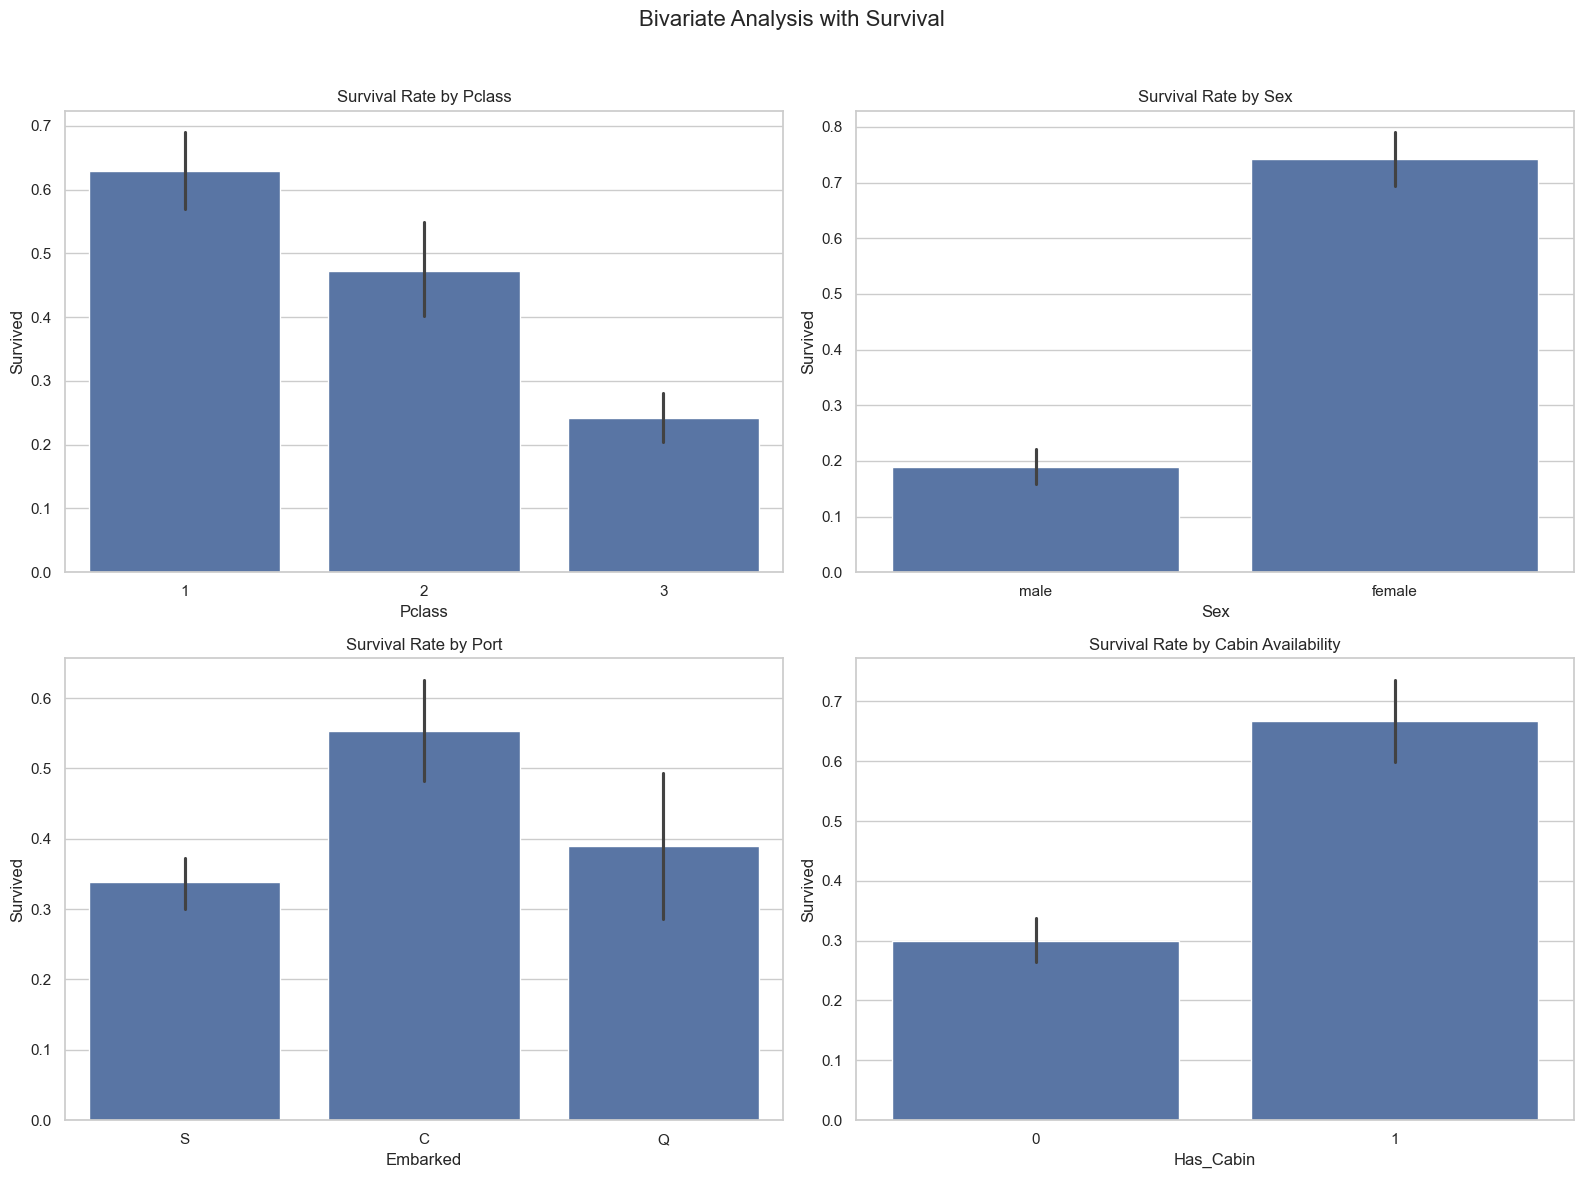

In [21]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=titanic_df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=titanic_df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

这些黑线称为置信区间。

在显示均值的条形图中（例如此处显示的生存率，即“存活”列中 0 和 1 的均值），置信区间表示真实均值可能落入的范围。较短的线表示均值的不确定性较小，而较长的线表示不确定性较大。

当您使用条形图时，Seaborn 会自动计算并显示这些 95% 置信区间。

**关键发现（双变量）：**

- **舱位等级：** 呈现出明显的趋势：头等舱乘客的生存率超过 60%，而三等舱乘客的生存率低于 25%。

- **性别：** 这是最强的预测因子。女性的生存率约为 75%，而男性的生存率低于 20%。

- **登船港口：** 从瑟堡（“C”）登船的乘客的生存率高于从其他港口登船的乘客。

- **是否拥有舱位：** 拥有登记舱位号的乘客的生存率要高得多。这可能与他们乘坐的是头等舱有关。

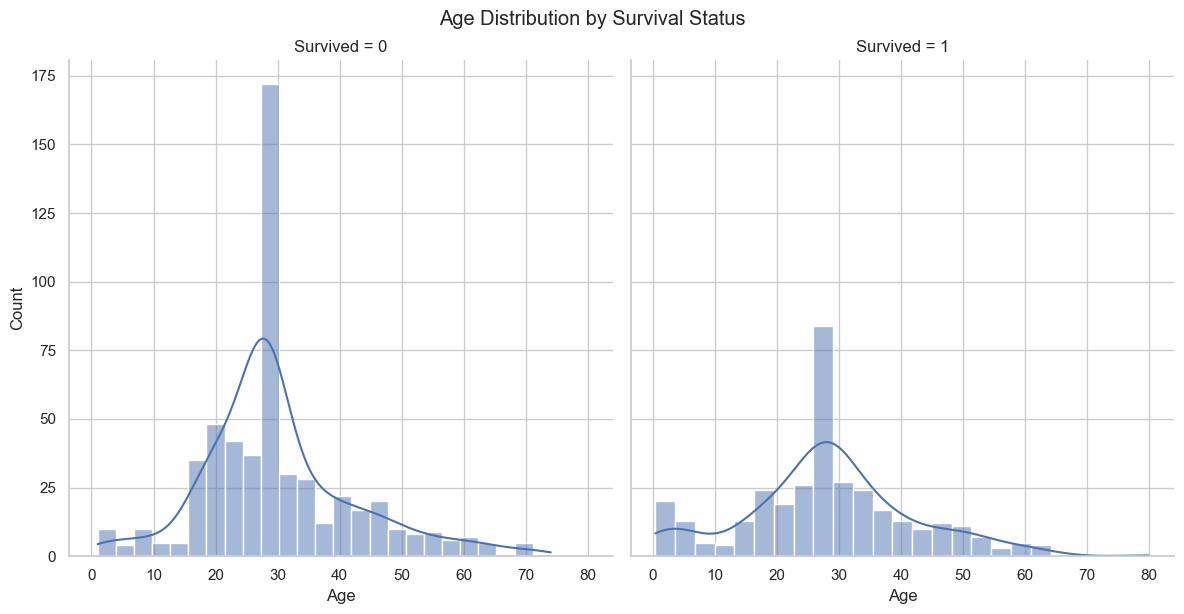

In [22]:
# Age vs. Survival
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

**关键发现（年龄与生存率）：**

- 婴儿和幼儿的生存概率较高。

- 大部分遇难者为20-40岁的年轻人。

- 年龄最大的乘客（80岁）未能幸存。

#### 深入分析：'Fare' 变量的异常值分析

`.describe()` 函数和直方图显示 'Fare' 变量存在极端异常值。让我们用箱线图更清晰地展示这一点。

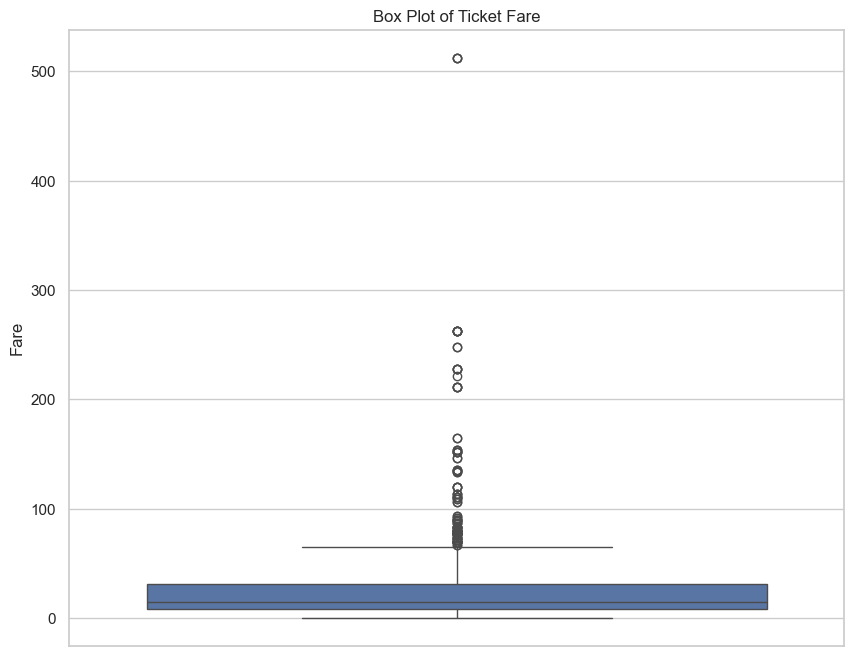

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**观察结果：**

箱线图证实存在显著的异常值。大多数票价集中在 100 美元以下，但也有一些票价远高于此，甚至超过 500 美元。这些很可能是预订了豪华套房的头等舱乘客。对于某些机器学习模型而言，处理这些异常值（例如，通过对数变换）将是重要的一步。

### 第六步：特征工程

现在，我们将从现有特征中创建新特征，以期挖掘更深层次的洞察，并为机器学习模型提供更有用的信息。

#### **理论概念：特征工程**

特征工程是指利用领域知识从原始数据中提取特征（特性、属性）的过程。一个好的特征应该与问题相关，并且易于模型理解。

**常用技术：**

1. **特征组合：** 通过组合其他特征来创建新特征（例如，`SibSp` + `Parch` = `FamilySize`）。

2. **文本提取：** 从文本特征中提取特定信息（例如，从 `Name` 列中提取标题）。

3. **分箱：** 将连续数值特征转换为类别特征（例如，将 `Age` 分箱为“儿童”、“成人”、“老年人”等组）。

In [24]:
# 1. Create a 'FamilySize' feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # +1 for the person themselves

# 2. Create an 'IsAlone' feature
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


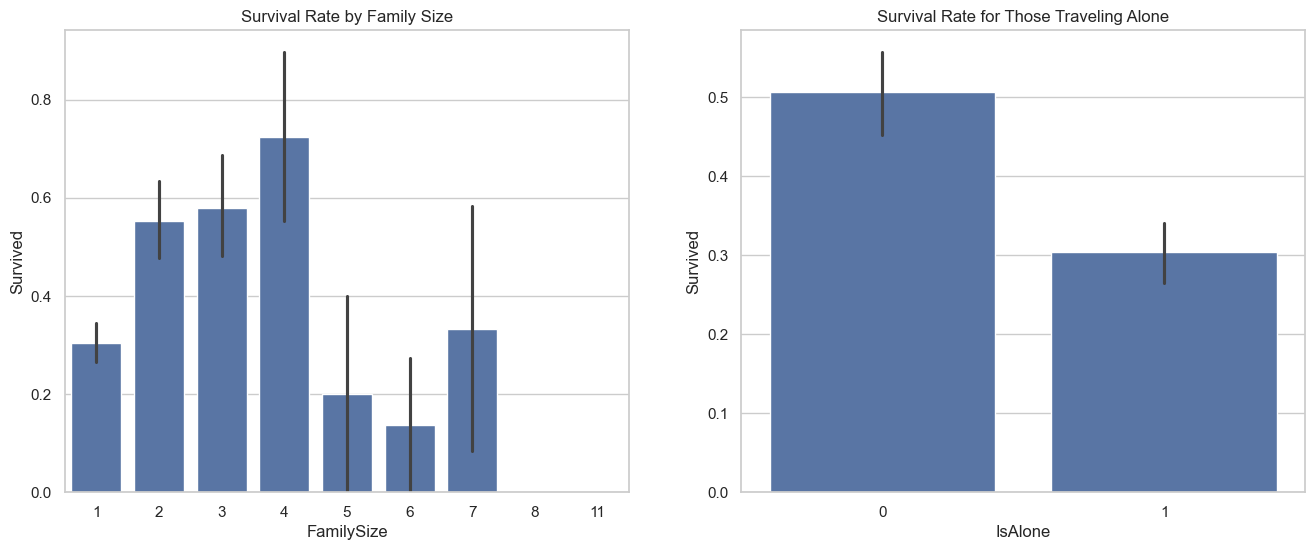

In [25]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

**分析结果：**

- 单独出行的乘客（`IsAlone=1`）的生存率（约30%）低于小型家庭的生存率。

- 2至4人的小家庭生存率最高。

- 5人或以上的大家庭生存率极低。这可能是因为大家庭更难保持团聚并撤离。

* 匹配空格。

* 姓名中的称谓通常以空格开头。([A-Za-z]+)：这是捕获组。

* [A-Za-z]+：匹配一个或多个大写或小写字母。这将捕获称谓本身（例如 Mr、Mrs、Miss 等）。

* \.：匹配通常位于称谓后面的句点 (.)。

In [26]:
# 3. Extract 'Title' from the 'Name' column
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

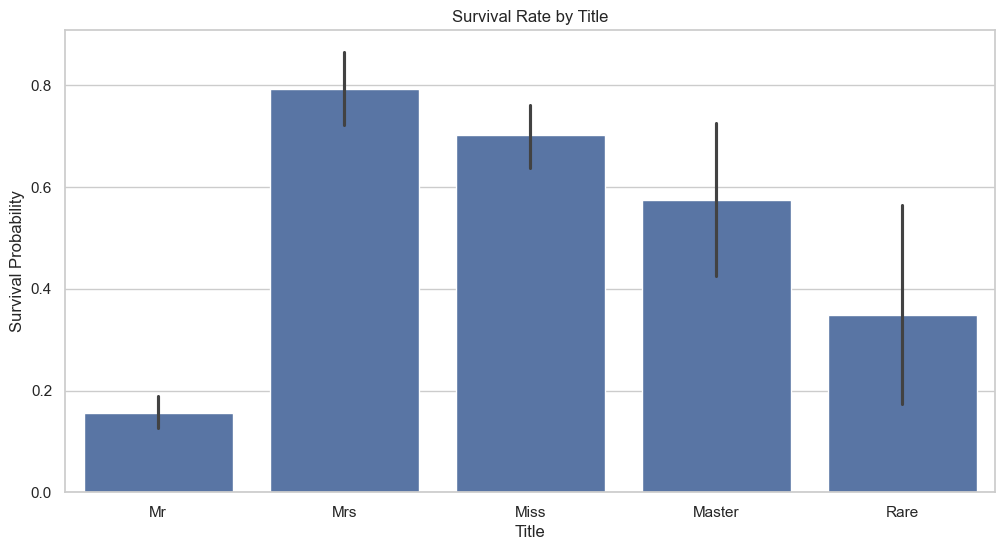

In [27]:
# Simplify the titles by grouping rare ones into a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**洞察：**

“称谓”这一特征为我们提供了重要的信息。“夫人”和“小姐”（女性）的存活率很高。“先生”（男性）的存活率则非常低。“少爷”（小男孩）的存活率显著高于“先生”，这进一步印证了“儿童优先”的理念。“稀有”称谓，通常与贵族或社会地位相关，其存活率也参差不齐，但总体而言高于普通男性。

### 第七步：多元分析

现在我们来同时探索多个变量之间的相互作用，包括我们新设计的特征。

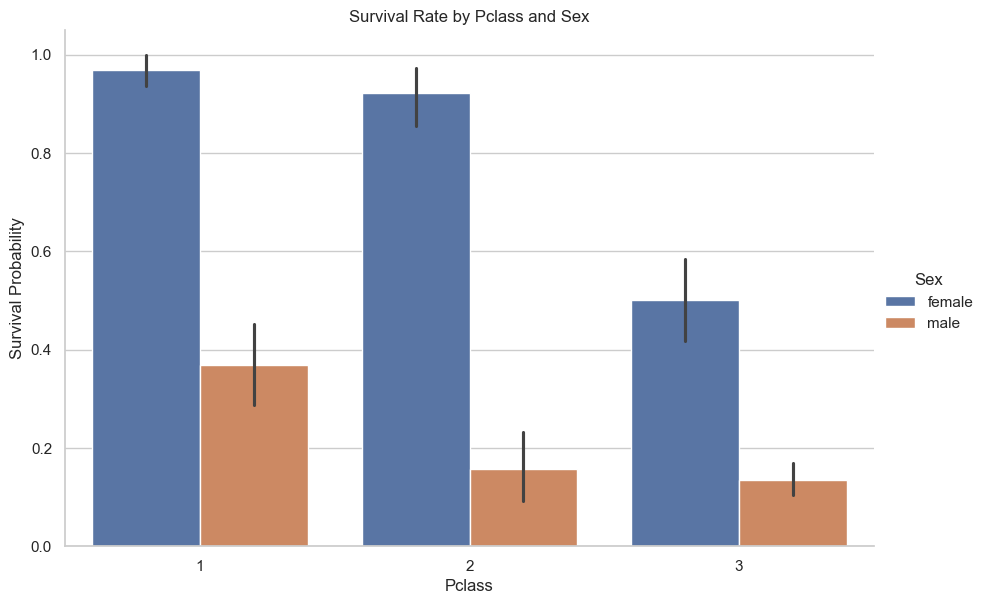

In [28]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

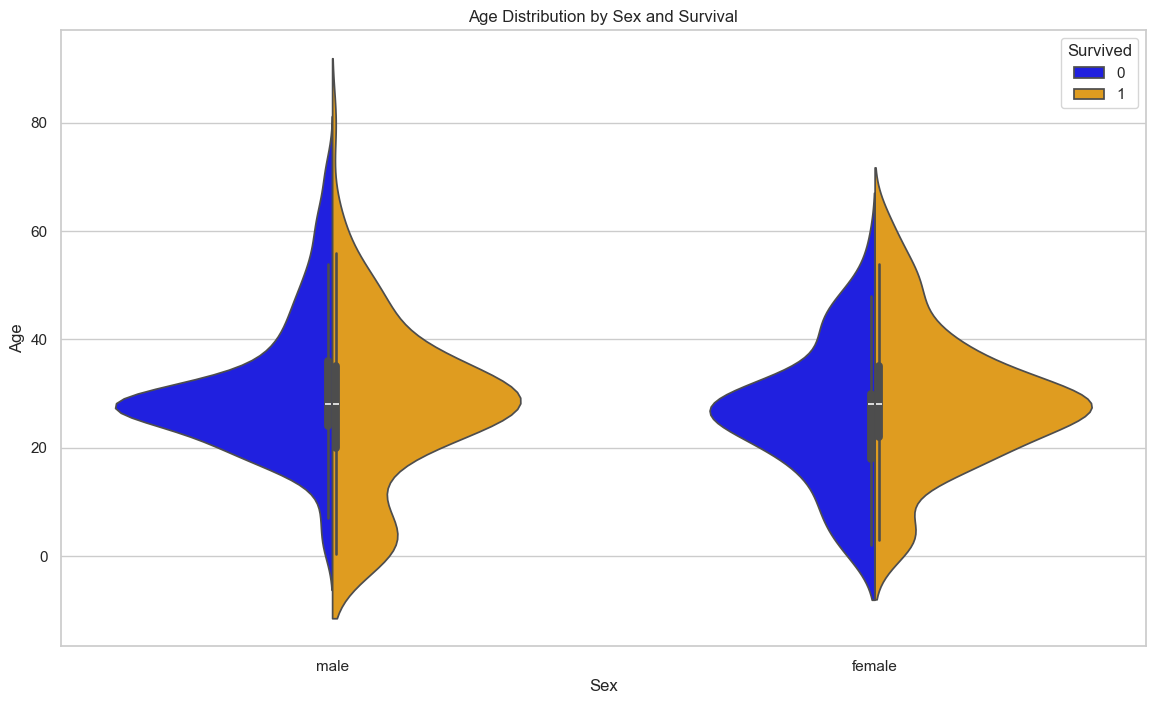

In [29]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**小提琴图分析：**

- 对于男性而言，幸存者（橙色）分布的峰值出现在非常年轻的年龄段（儿童），而非幸存者的峰值则在 20-30 岁之间。

- 对于女性而言，幸存者的分布范围更广，表明大多数年龄段的女性都有较高的生存几率。

### 第 8 步：相关性分析

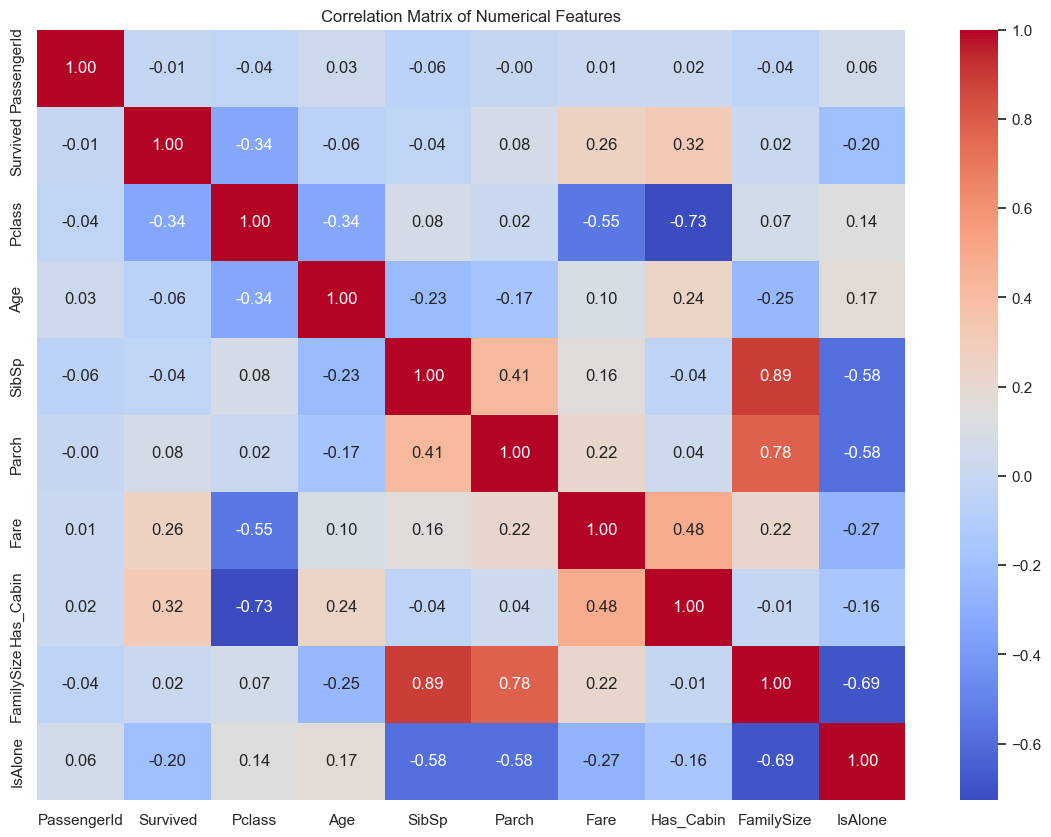

In [30]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**热图解读：**

- “幸存”与“票价”和“有舱位”呈显著正相关，与“舱位等级”和我们新增的“独自一人”特征呈负相关。

- “舱位等级”和“票价”呈强负相关，这符合预期（头等舱票价较高）。

- 我们新增的“家庭规模”特征由“兄弟姐妹人数”和“乘客人数”组成，因此根据定义，它与这两者高度相关。

In [31]:
import pandas as pd

# Create a sample DataFrame
sample_data = {'col1': [1, 2, 3, 4],
               'col2': ['A', 'B', 'C', 'D'],
               'col3': [True, False, True, False]}
sample_df = pd.DataFrame(sample_data)

# Display the sample DataFrame
print("Sample DataFrame:")
display(sample_df)

Sample DataFrame:


,col1,col2,col3
0,1,A,True
1,2,B,False
2,3,C,True
3,4,D,False


### 这里添加了一个示例数据框，请对泰坦尼克号数据框进行分析，并提供其y轴剖面分析结果。

In [32]:
# Install ydata-profiling
!pip install ydata-profiling -q

In [36]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(sample_df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00, 76.79it/s]


In [34]:
# Save the report to an HTML file
profile.to_file("sample.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 663.55it/s]


### 提交说明

本次作业要求您在完成数据清洗步骤后提交 ydata-profiling 数据。

1. **运行 ydata-profiling 代码：** 请确保您已运行上述代码单元格，以在笔记本中生成并显示分析报告。

2. **保存笔记本：** 使用上述示例代码创建 HTML 报告并与我们分享。

### 第九步：最终结论和洞察总结

这项端到端的探索性数据分析 (EDA) 使我们对泰坦尼克号数据集有了深入的了解。我们的分析证实了“妇女儿童优先”的说法，并突显了当时社会存在的严重不平等。通过特征工程，我们为潜在的机器学习模型创建了更强大的预测因子。

**主要发现：**

1. **最强的生存预测因子：**

- **称谓和性别：** 女性（“夫人”、“小姐”）是最重要的优势。我们设计的“称谓”特征比单独的“性别”特征更能体现这一细微差别，同时也表明，年轻男孩（“少爷”）的生存率远高于成年男性（“先生”）。

- **乘客舱位：** 存在明显的生存等级：头等舱 > 二等舱 > 三等舱。

- **年龄：** 儿童和婴儿的生存率更高。

2. **其他影响因素：**

- **家庭规模：**与家人（2-4人）同行可提高生存几率，而独自旅行或与家人人数众多者同行则会降低生存几率。

- **票价/舱位：**拥有舱位（因此支付更高的票价）与生存率密切相关，可作为财富和乘客等级的指标。

- **出发港口：**来自瑟堡（“C”）的乘客生存率更高，可能是因为他们中头等舱乘客的比例更高。

这些发现对于数据科学流程的下一步至关重要：构建预测生存率的机器学习模型。